# 101 - İlk yapay sinir ağımız, Dense layer

Bu örnekte ilk yapay sinir ağımızı gürültülü veri ile sinüs fonksiyonunu taklit etmek üzere eğiteceğiz.


In [1]:
%matplotlib inline
from keras.layers import Dense
from keras.models import Sequential
import random
import matplotlib.pyplot as plt
import math

Using TensorFlow backend.


## Training set (Öğrenme kümesi)'nin oluşturulması

İlk olarak ağımızı eğitmek için kullanacağımız training set'i oluşturuyoruz. Ağın sinüs fonksiyonunu öğrenmesini istiyoruz, bu yüzden X radyan olarak rastgele açı değerleri, y ilgili açının sinüsü olacak şekilde 600 tane örnek oluşturuyoruz. 

Gerçek dünyada gürültü içermeyen çok az veri vardır. Yapay sinir ağlarının gürültülü veriyle bile genelleme yapabilme gücünü  gösterebilmek için y değerlerini rastgele bir miktar kaydırıyorum. Gürültünün miktarıyla noiserate değişkenini değiştirerek oynayabilirsiniz.

/home/jimqode/tensorflow/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


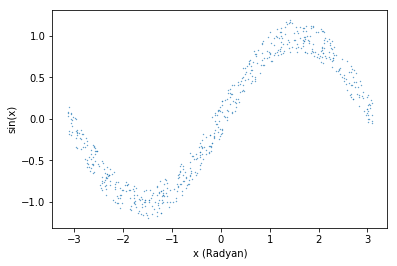

In [2]:
noiserate = 0.2
X = []
y = []
for i in range(0,600):
    angle=random.uniform(-math.pi,math.pi)
    X.append(angle)
    y.append(math.sin(angle)+random.uniform(-noiserate,noiserate))

plt.scatter(X,y,s=0.1)
plt.xlabel('x (Radyan)')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

## Modelin oluşturulması

Modelimiz iki katmandan oluşuyor. İlk katmanda 80 adet nöron var ve bunların her birinin girişi verimizin girdisine *(X)*, yani açı değişkenine bağlı. Ayrıca bu katmandaki nöronların herbirinin çıkışı *RELU* adı verilen bir aktivasyon fonksiyonundan geçiyor ama şimdilik bunu umursayın. Bu konuya daha sonra değineceğim. İkinci katmanda ise tek bir nöron var. İlk katmandaki tüm nöronların çıkışları, bu tek nörona bağlanıyor. Bu tek nöronun çıkışı da bizim sinüs değerimizi *(y)* verecek.

Modelimizi eğitebilmek için bir *loss* fonksiyonu seçmemiz gerekli. Loss fonksiyonu çıkışımın, istediğimiz değere ne kadar uzak olduğunu gösteren bir fonksiyon. Aslında öğrenme işleminin yaptığı şey bu değeri minimize etmeye çalışmak. Ben burada *Mean Square Error* (Karesel ortalama hata) fonksiyonunu seçtim.

Diğer ihtiyacımız olan şey ise bir *optimizer*, yani *loss*'un nöronların birbirleriyla bağlantı ağırlıklarını güncellemek için nasıl dağıtılacağını belirleyen algoritmamız. Bunun için de en basit *optimizer* algoritmalarından biri olan *Stochastic Gradient Descent* algoritmasını seçtim.

In [3]:
model = Sequential()
model.add(Dense(80, input_shape=(1,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='sgd')


## Eğitim şart

Artık `model.fit()` fonksiyonunu çağırarak modelimizi eğitebiliriz. Modelimizi ürettiğimiz *training set*'ten X ve y değerleriyle çağırıyoruz ve eğitimin 50 *epoch* sürmesini istediğimizi belirtiyor. Training setteki her değerin üzerinden bir kere geçilmesine 1 *epoch* adı veriliyor.

In [4]:
model.fit(X, y, epochs=50)

Epoch 1/50
600/600 [==============================] - 0s - loss: 0.3560     
Epoch 2/50
600/600 [==============================] - 0s - loss: 0.1972     
Epoch 3/50
600/600 [==============================] - 0s - loss: 0.1764     
Epoch 4/50
600/600 [==============================] - 0s - loss: 0.1694     
Epoch 5/50
600/600 [==============================] - 0s - loss: 0.1628     
Epoch 6/50
600/600 [==============================] - 0s - loss: 0.1580     
Epoch 7/50
600/600 [==============================] - 0s - loss: 0.1530     
Epoch 8/50
600/600 [==============================] - 0s - loss: 0.1479     
Epoch 9/50
600/600 [==============================] - 0s - loss: 0.1436     
Epoch 10/50
600/600 [==============================] - 0s - loss: 0.1390     
Epoch 11/50
600/600 [==============================] - 0s - loss: 0.1354     
Epoch 12/50
600/600 [==============================] - 0s - loss: 0.1322     
Epoch 13/50
600/600 [==============================] - 0s - loss: 0.1280 

*Loss* değerinin gitgide azaldığını görebiliyoruz. Demek ki modelimiz öğreniyor. Ne öğrendiğini görselleştirmeye çalışalım.

Öncelikle sıralı ve gürültüsüz bir test kümesi oluşturalım. 

In [5]:
X_test = []
y_test = []
for i in range(-1800,1800):
    angle = math.radians(i/10)
    X_test.append(angle)
    y_test.append(math.sin(angle))



Şimdi de ağımız çıktısı ve beklenilen çıktıyı bir grafik halinde çizelim

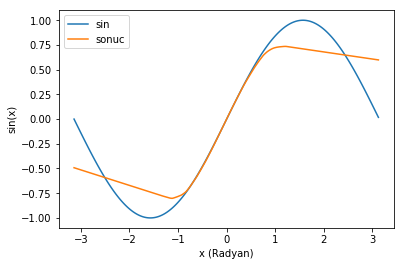

In [6]:
def testmodel(X,y):
    res = model.predict(X, batch_size=32)

    plt.plot(X,y, label='sin')
    plt.plot(X,res, label='sonuc')
    plt.xlabel('x (Radyan)')
    plt.ylabel('sin(x)')
    plt.legend()
    plt.show()
    
testmodel(X_test,y_test)

Görüldüğü gibi modelimiz birşeyler öğrenmeye başlamış. Biraz daha eğitime devam edelim. Yeniden model.compile'ı çağırmadığımız sürece eğitime kaldığımız yerden devam edebiliriz.

Epoch 1/50
600/600 [==============================] - 0s - loss: 0.0537     
Epoch 2/50
600/600 [==============================] - 0s - loss: 0.0525     
Epoch 3/50
600/600 [==============================] - 0s - loss: 0.0517     
Epoch 4/50
600/600 [==============================] - 0s - loss: 0.0507     
Epoch 5/50
600/600 [==============================] - 0s - loss: 0.0499     
Epoch 6/50
600/600 [==============================] - 0s - loss: 0.0489     
Epoch 7/50
600/600 [==============================] - 0s - loss: 0.0482     
Epoch 8/50
600/600 [==============================] - 0s - loss: 0.0473     
Epoch 9/50
600/600 [==============================] - 0s - loss: 0.0464     
Epoch 10/50
600/600 [==============================] - 0s - loss: 0.0458     
Epoch 11/50
600/600 [==============================] - 0s - loss: 0.0446     
Epoch 12/50
600/600 [==============================] - 0s - loss: 0.0439     
Epoch 13/50
600/600 [==============================] - 0s - loss: 0.0431 

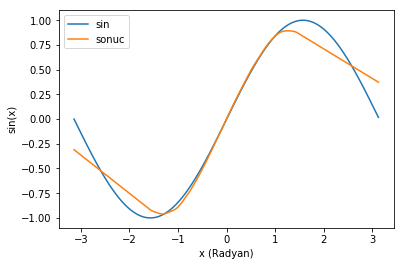

In [7]:
model.fit(X, y, epochs=50, verbose=0)
testmodel(X_test,y_test)

Gitgide sinus fonksiyonunu yaklaşıyoruz. bu kez bir 500 *epoch* daha dönelim ve sonucu görelim.

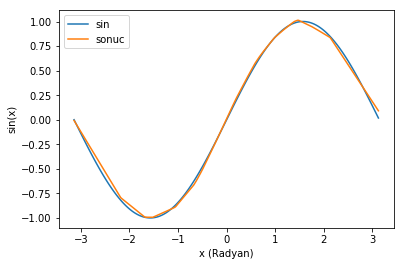

In [8]:
model.fit(X, y, epochs=500, verbose=0)
testmodel(X_test,y_test)

Hiç fena değil lan bence. 

## Ödevler

- *Training set*'teki gürültü miktarını arttırmak veya azaltmak ağın performansını nasıl değiştiriyor?
- Ağ'ın ilk katmanındaki nöron sayısını arttırmak veya azaltmak ağın performansını nasıl değiştiriyor?
- Bu basit ağ modelini farklı tek giriş, tek çıkışa sahip fonksiyonlarla veya verilerle eğitmeyi deneyin.
